### MinMax Pipeline ###

In [13]:
## loading useful stuff

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
from sklearn import datasets
from scipy.stats import iqr
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv("Use_This.csv", index_col=0, header=0)
data.head()

,Year,Assigned_ID,Bank,IncRat,UPB,LTV,MortDate,Purpose,Coop,Product,...,LTV_M,Purpose_M,Coop_M,Product_M,Occup_M,Back_M,BoCreditScor_M,PropType_M,Loan_Multiplier,Portfolio_Worthy
0,2016,2004452,Atlanta,1.5112,383368,0.84,2015,2,2,1,...,0.13,1.61,1.0,0.879,1.0,2.345,1.76,1.0,0.759300,1
1,2016,2004453,Atlanta,0.7347,112822,0.76,2015,2,2,1,...,0.13,1.61,1.0,0.879,1.0,2.345,1.76,1.0,0.759300,1
2,2016,2004454,Atlanta,0.8536,125345,1.00,2015,1,2,1,...,0.13,1.00,1.0,0.879,1.0,2.345,1.76,1.0,0.471615,1
3,2016,2004455,Atlanta,1.4262,162084,1.03,2015,1,2,1,...,0.13,1.00,1.0,0.879,1.0,2.345,1.76,1.0,0.471615,1
4,2016,2004456,Atlanta,2.0272,396490,0.89,2015,1,2,1,...,0.13,1.00,1.0,0.879,1.0,2.345,1.76,1.0,0.471615,1


In [14]:
# Splitting data into target/data variables

target = data.Portfolio_Worthy
data_year = data.Year
data_assigned = data.Assigned_ID
data_bank = data.Bank
data_mortdate = data.MortDate
data = data.drop(columns=['Year','Assigned_ID','Bank','MortDate','Portfolio_Worthy','IncRat','UPB','LTV','Purpose','Coop','Product','Occup','Back','BoCreditScor','PropType','FedGuar','Front'], axis=1)

In [15]:
data.head()

,LTV_M,Purpose_M,Coop_M,Product_M,Occup_M,Back_M,BoCreditScor_M,PropType_M,Loan_Multiplier
0,0.13,1.61,1.0,0.879,1.0,2.345,1.76,1.0,0.759300
1,0.13,1.61,1.0,0.879,1.0,2.345,1.76,1.0,0.759300
2,0.13,1.00,1.0,0.879,1.0,2.345,1.76,1.0,0.471615
3,0.13,1.00,1.0,0.879,1.0,2.345,1.76,1.0,0.471615
4,0.13,1.00,1.0,0.879,1.0,2.345,1.76,1.0,0.471615


#### Outliers ####

__There are no outliers, since everything is binned for the features.__

#### Normalization ####

In [17]:
# Checking the mean
data.mean()

LTV_M              0.129744
Purpose_M          1.338671
Coop_M             1.000000
Product_M          0.879000
Occup_M            1.005951
Back_M             2.345000
BoCreditScor_M     1.313974
PropType_M         1.009082
Loan_Multiplier    0.469915
dtype: float64

#### Skewness ####

In [18]:
# Checking Skewness
data.skew()

LTV_M              -2.970988
Purpose_M          -0.222157
Coop_M              0.000000
Product_M           0.000000
Occup_M             6.935553
Back_M              0.000000
BoCreditScor_M      2.379448
PropType_M         12.122335
Loan_Multiplier     2.292742
dtype: float64

__These skew values all look good. 'PropType_M' and 'Occup_M' are categorical variables, so I do not have to change the skew for them.__

In [19]:
# Printing the data
data.head()

,LTV_M,Purpose_M,Coop_M,Product_M,Occup_M,Back_M,BoCreditScor_M,PropType_M,Loan_Multiplier
0,0.13,1.61,1.0,0.879,1.0,2.345,1.76,1.0,0.759300
1,0.13,1.61,1.0,0.879,1.0,2.345,1.76,1.0,0.759300
2,0.13,1.00,1.0,0.879,1.0,2.345,1.76,1.0,0.471615
3,0.13,1.00,1.0,0.879,1.0,2.345,1.76,1.0,0.471615
4,0.13,1.00,1.0,0.879,1.0,2.345,1.76,1.0,0.471615


In [20]:
# Concatinting the target back to the data set
data = pd.concat([data, target], axis=1, join='inner')
data = pd.concat([data, data_year], axis=1, join='inner')
data = pd.concat([data, data_bank], axis=1, join='inner')
data = pd.concat([data, data_mortdate], axis=1, join='inner')
data = pd.concat([data, data_assigned], axis=1, join='inner')
data.head()

,LTV_M,Purpose_M,Coop_M,Product_M,Occup_M,Back_M,BoCreditScor_M,PropType_M,Loan_Multiplier,Portfolio_Worthy,Year,Bank,MortDate,Assigned_ID
0,0.13,1.61,1.0,0.879,1.0,2.345,1.76,1.0,0.759300,1,2016,Atlanta,2015,2004452
1,0.13,1.61,1.0,0.879,1.0,2.345,1.76,1.0,0.759300,1,2016,Atlanta,2015,2004453
2,0.13,1.00,1.0,0.879,1.0,2.345,1.76,1.0,0.471615,1,2016,Atlanta,2015,2004454
3,0.13,1.00,1.0,0.879,1.0,2.345,1.76,1.0,0.471615,1,2016,Atlanta,2015,2004455
4,0.13,1.00,1.0,0.879,1.0,2.345,1.76,1.0,0.471615,1,2016,Atlanta,2015,2004456


In [21]:
# Exporting data to csv file
data.to_csv("MinMax.csv", sep=',')

#### Correlation ####

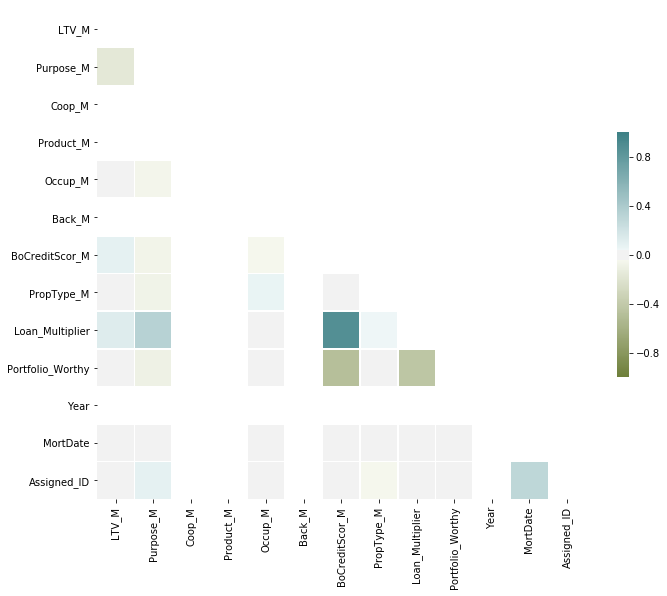

In [22]:
# Checking if the correlation changed
### WE ARE USING THIS CODE FROM COMPETITION 1

## We will make it look nicer to the eye
# Visualizing a Correlation Matrix
correlation_visual = data.corr(method='spearman')

# Have to generate a mask(hide) for the upper triangle
hide = np.zeros_like(correlation_visual, dtype=np.bool)
hide[np.triu_indices_from(hide)] = True

# Setting the subplot for the correlation matrix
f , ax = plt.subplots(figsize=(11,9))

# Generating a diverging colormap
cmap = sns.diverging_palette(100, 200, as_cmap=True)

# Adding the heatmap
sns.heatmap(correlation_visual, mask=hide, cmap=cmap, vmin=-1,vmax=1, center=0, square=True, linewidths=.6, cbar_kws={"shrink": .5})

In [23]:
# Numerical correlation
print(data.corr(method='spearman'))

                     LTV_M  Purpose_M  Coop_M  Product_M   Occup_M  Back_M  \
LTV_M             1.000000  -0.156343     NaN        NaN -0.000101     NaN   
Purpose_M        -0.156343   1.000000     NaN        NaN -0.055468     NaN   
Coop_M                 NaN        NaN     NaN        NaN       NaN     NaN   
Product_M              NaN        NaN     NaN        NaN       NaN     NaN   
Occup_M          -0.000101  -0.055468     NaN        NaN  1.000000     NaN   
Back_M                 NaN        NaN     NaN        NaN       NaN     NaN   
BoCreditScor_M    0.086404  -0.068434     NaN        NaN -0.042322     NaN   
PropType_M       -0.015613  -0.076600     NaN        NaN  0.064162     NaN   
Loan_Multiplier   0.126490   0.341840     NaN        NaN -0.003080     NaN   
Portfolio_Worthy -0.013132  -0.090850     NaN        NaN  0.015393     NaN   
Year                   NaN        NaN     NaN        NaN       NaN     NaN   
MortDate          0.005686   0.019498     NaN        NaN  0.0119